In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#importing necessary libraries
import scipy.stats as stats
import pylab

## Cleaning for food insecurity covid cases Dataset

In [2]:
food_covid_df=pd.read_csv('food_insecurity_covid_cases.csv')

/tmp/ipykernel_1109556/2481311948.py:1: DtypeWarning: Columns (5,6,8,9,10,11,13,14,15,16,17,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  food_covid_df=pd.read_csv('food_insecurity_covid_cases.csv')


In [3]:
food_covid_df.head()

,Enough of the kinds of food wanted,"Enough Food, but not always the kinds wanted",Sometimes not enough to eat,Often not enough to eat,Age,Sex_At_Birth,Race,Education,Marital_Status,Children_Present,...,Active_Duty,House_Receives_SNAP,Used_To_Meet_Needs,Provider_Of_Free_Groceries,Freq_Feel_Depressed,Freq_Feel_Anxious,Year,week_name,Week,New Covid Cases
0,121151.0,88797.0,2389.0,0.0,18 - 24,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0
1,493462.0,413244.0,164615.0,46441.0,25 - 39,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0
2,501828.0,282464.0,93254.0,36167.0,40 - 54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0
3,484964.0,179435.0,36182.0,2111.0,55 - 64,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0
4,544074.0,190534.0,2312.0,0.0,65 and above,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0


In [4]:
food_covid_df.shape

(232764, 30)

In [5]:
food_covid_df.columns

Index(['Enough of the kinds of food wanted',
       'Enough Food, but not always the kinds wanted',
       'Sometimes not enough to eat', 'Often not enough to eat', 'Age',
       'Sex_At_Birth', 'Race', 'Education', 'Marital_Status',
       'Children_Present', 'Unemployed_Last_4', 'Employed_Last_7',
       'Reason_Not_Working', 'Receiving_Pay_No_Work', 'Income',
       'Health_Status', 'Covered_By_Insurance', 'Caught_Up_On_Mortgage',
       'Location', 'Household_Size', 'Active_Duty', 'House_Receives_SNAP',
       'Used_To_Meet_Needs', 'Provider_Of_Free_Groceries',
       'Freq_Feel_Depressed', 'Freq_Feel_Anxious', 'Year', 'week_name', 'Week',
       'New Covid Cases'],
      dtype='object')

#### Handling Missing Values

In [88]:
#To find the number of `Nan` objects within the given series
food_covid_df.isna().sum()

Enough of the kinds of food wanted                   0
Enough Food, but not always the kinds wanted         0
Sometimes not enough to eat                          0
Often not enough to eat                              0
Age                                             223329
Sex_At_Birth                                    230418
Race                                            226899
Education                                       227460
Marital_Status                                  226899
Children_Present                                230826
Unemployed_Last_4                               229245
Employed_Last_7                                 229245
Reason_Not_Working                              207468
Receiving_Pay_No_Work                           228684
Income                                          222207
Health_Status                                   227868
Covered_By_Insurance                            228327
Caught_Up_On_Mortgage                           227460
Location  

In [89]:
food_covid_df.shape

(232764, 30)

In [90]:
food_covid_df.dropna().shape

(0, 30)

In [91]:
food_covid_df.dropna(how = 'all').shape

(232764, 30)

In [92]:
columns_list = list(food_covid_df.columns)
for col_name in columns_list:
    percent = (food_covid_df[col_name].isna().sum()/food_covid_df.shape[0])*100
    print(f'The percentage of null values in the column {col_name} is :     ', percent)

The percentage of null values in the column Enough of the kinds of food wanted is :      0.0
The percentage of null values in the column Enough Food, but not always the kinds wanted is :      0.0
The percentage of null values in the column Sometimes not enough to eat is :      0.0
The percentage of null values in the column Often not enough to eat is :      0.0
The percentage of null values in the column Age is :      95.94653812445223
The percentage of null values in the column Sex_At_Birth is :      98.99211218229624
The percentage of null values in the column Race is :      97.48028045574057
The percentage of null values in the column Education is :      97.72129710780018
The percentage of null values in the column Marital_Status is :      97.48028045574057
The percentage of null values in the column Children_Present is :      99.16739702015775
The percentage of null values in the column Unemployed_Last_4 is :      98.48816827344434
The percentage of null values in the column Employ

The percentage of null values in each categorical columns except Location, week_name, week, Year is approximately greater than 90% and data in which it is aggregated cannot perform any kind of imputaions for categorical variables

In [93]:
food_covid_df.shape

(232764, 30)

### Droping Null Instances of Covid 

In [94]:
food_covid_df.dropna(subset=['New Covid Cases'],inplace = True)

In [95]:
food_covid_df.shape

(177207, 30)

### Handling Duplicates

In [96]:
food_covid_df.shape

(177207, 30)

In [97]:
food_covid_df.duplicated().value_counts()

False    176933
True        274
dtype: int64

In [98]:
food_covid_df.drop_duplicates(inplace = True)

In [99]:
food_covid_df.shape

(176933, 30)

Successfully handled duplicates instances present in the dataset

### Checking Datatypes

In [100]:
food_covid_df.dtypes

Enough of the kinds of food wanted              float64
Enough Food, but not always the kinds wanted    float64
Sometimes not enough to eat                     float64
Often not enough to eat                         float64
Age                                              object
Sex_At_Birth                                     object
Race                                             object
Education                                        object
Marital_Status                                   object
Children_Present                                 object
Unemployed_Last_4                                object
Employed_Last_7                                  object
Reason_Not_Working                               object
Receiving_Pay_No_Work                            object
Income                                           object
Health_Status                                    object
Covered_By_Insurance                             object
Caught_Up_On_Mortgage                           

### Checking for Outliers

The way in which the Food Security Data was aggregated with different categorical variables and its dependent values, can perform outliers test between each category variable and its dependent variables(Enough of the kinds of food wanted,Enough Food, but not always the kinds wanted,Sometimes not enough to eat,Often not enough to eat), But we can perform for New Covid Cases column

#### Detecting outliers using Boxplot:

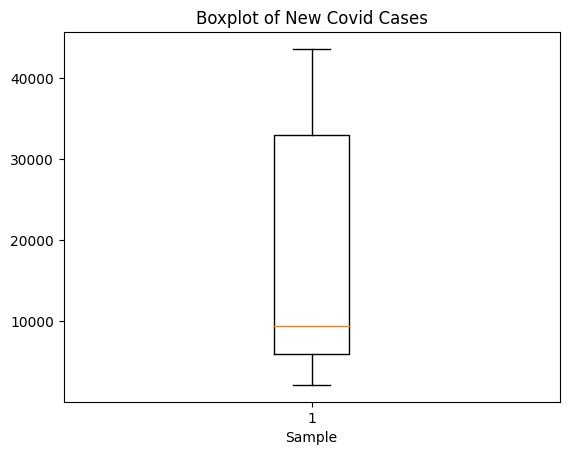

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(food_covid_df["New Covid Cases"])
plt.title("Boxplot of New Covid Cases")
plt.xlabel('Sample')
plt.show()


There are no outliers present in the new covid cases column

In [102]:
food_covid_df.to_csv('food_covid_cleaned.csv',index = False)

In [103]:
pd.read_csv('food_covid_cleaned.csv').head()

/tmp/ipykernel_904580/431774743.py:1: DtypeWarning: Columns (9,13,15,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('food_covid_cleaned.csv').head()


,Enough of the kinds of food wanted,"Enough Food, but not always the kinds wanted",Sometimes not enough to eat,Often not enough to eat,Age,Sex_At_Birth,Race,Education,Marital_Status,Children_Present,...,Active_Duty,House_Receives_SNAP,Used_To_Meet_Needs,Provider_Of_Free_Groceries,Freq_Feel_Depressed,Freq_Feel_Anxious,Year,week_name,Week,New Covid Cases
0,121151.0,88797.0,2389.0,0.0,18 - 24,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0
1,493462.0,413244.0,164615.0,46441.0,25 - 39,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0
2,501828.0,282464.0,93254.0,36167.0,40 - 54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0
3,484964.0,179435.0,36182.0,2111.0,55 - 64,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0
4,544074.0,190534.0,2312.0,0.0,65 and above,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,April 23 - May 5,week1,22694.0
